In [1]:
import librosa
import numpy as np 
import matplotlib.pyplot as plt
import IPython.display as ipd
import sklearn
import librosa.display

In [2]:
filename = "../data/audio.files/235.wav"

y, sr = librosa.load(filename)

times = librosa.samples_to_time(np.arange(len(y)))

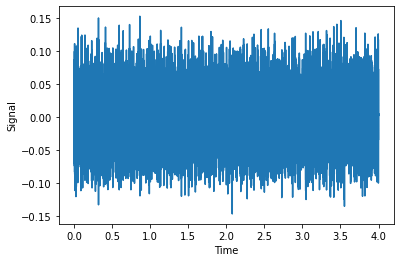

In [3]:
fig, ax = plt.subplots()
ax.plot(times, y)
ax.set(xlabel='Time', ylabel='Signal');

In [4]:
ipd.display(ipd.Audio(data=y, rate=sr))

Text(0.5, 1.0, 'First Frame of Y')

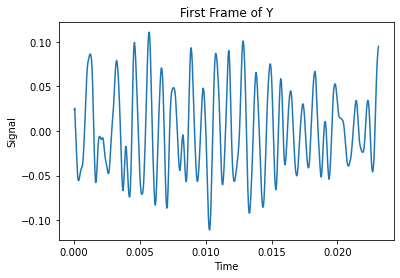

In [5]:
y_1_frame = y[:511]
times = librosa.samples_to_time(np.arange(len(y_1_frame)))
fig, ax = plt.subplots()
ax.plot(times, y_1_frame)
ax.set(xlabel='Time', ylabel='Signal');
ax.set_title("First Frame of Y")

Text(0.5, 1.0, 'First 2 Frames of Y')

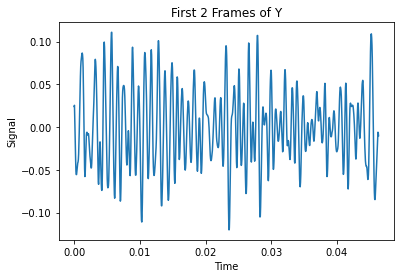

In [6]:
y_2_frames = y[:1023]
times = librosa.samples_to_time(np.arange(len(y_2_frames)))
fig, ax = plt.subplots()
ax.plot(times, y_2_frames)
ax.set(xlabel='Time', ylabel='Signal');
ax.set_title("First 2 Frames of Y")

# Features - Zero Crossing Rate

In [7]:
librosa.feature.zero_crossing_rate(y_1_frame)

array([[0.02148438]])

In [8]:
librosa.feature.zero_crossing_rate(y_2_frames)

array([[0.04736328, 0.04736328]])

In [9]:
zcr = librosa.feature.zero_crossing_rate(y)

In [10]:
zcr.shape

(1, 173)

In [11]:
print("Sum of zcr:", zcr[0].sum())
print("Mean of zcr:", zcr[0].mean())
print("Mean of zcr:", zcr[0].std())

Sum of zcr: 15.4853515625
Mean of zcr: 0.08951070267341041
Mean of zcr: 0.005802594078391482


# Features - Spectral Centroid

In [12]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape

(173,)

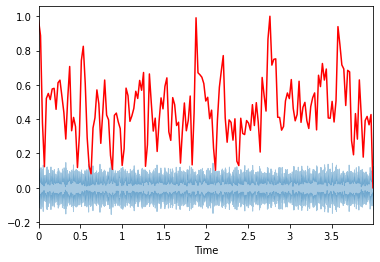

In [13]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

# Features -  Mel-Frequency Cepstral Coefficients

In [14]:
mfccs = librosa.feature.mfcc(y,sr=sr)

In [15]:
mfccs

array([[-253.53027   , -261.88046   , -285.5695    , ..., -294.45215   ,
        -273.38715   , -267.34955   ],
       [ 196.48709   ,  200.97375   ,  198.22366   , ...,  198.59651   ,
         219.34274   ,  219.08395   ],
       [ -82.43321   ,  -90.0421    , -115.92663   , ..., -118.54465   ,
         -96.81311   ,  -74.031906  ],
       ...,
       [ -14.587164  ,  -18.953587  ,  -27.603298  , ...,  -24.964031  ,
         -10.57234   ,   -8.206724  ],
       [  -2.6252503 ,   -0.71579236,   -7.893542  , ...,   -8.502968  ,
           1.8544617 ,    4.538973  ],
       [  -3.6994839 ,   -7.9590054 ,  -18.775824  , ...,  -18.569824  ,
          -8.881149  ,    0.94463944]], dtype=float32)

In [16]:
len(mfccs[0])

173